# Get Data

Get some data and turn it into a dataframe...

In [51]:
import pandas as pd
import seaborn as sns

%matplotlib inline

## Load

In [9]:
df_recent = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
df_hist = pd.read_csv('https://data.london.gov.uk/download/recorded_crime_summary/2bbd58c7-6be6-40ac-99ed-38c0ee411c8e/MPS%20Borough%20Level%20Crime%20%28Historical%29.csv')

In [11]:
df_hist

,MajorText,MinorText,LookUp_BoroughName,201004,201005,201006,201007,201008,201009,201010,...,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,11,10,6,6,13,...,3,5,3,6,9,8,6,4,5,6
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,208,193,227,220,204,163,199,...,113,134,118,109,109,97,122,97,103,107
2,Burglary,Burglary Business and Community,Barking and Dagenham,49,58,59,47,46,51,52,...,27,31,35,37,30,30,26,31,17,28
3,Burglary,Domestic Burglary,Barking and Dagenham,118,102,124,137,153,136,116,...,96,71,67,80,97,114,130,116,123,97
4,Drug Offences,Drug Trafficking,Barking and Dagenham,9,6,5,12,9,7,11,...,6,12,8,7,10,14,3,17,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,Vehicle Offences,Theft from a Motor Vehicle,Westminster,231,215,204,213,167,197,197,...,304,266,250,270,352,301,382,317,344,230
1715,Vehicle Offences,Theft or Taking of a Motor Vehicle,Westminster,79,54,46,41,55,82,87,...,57,71,63,55,56,58,53,75,56,53
1716,Violence Against the Person,Homicide,Westminster,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1717,Violence Against the Person,Violence with Injury,Westminster,271,283,289,328,288,270,319,...,330,361,407,313,328,364,364,299,276,260


Convert from wide to long format

In [42]:
df = pd.concat([pd.melt(df_recent, id_vars=['MajorText', 'MinorText', 'LookUp_BoroughName'], var_name='yearmonth'),
              pd.melt(df_hist, id_vars=['MajorText', 'MinorText', 'LookUp_BoroughName'], var_name='yearmonth')],
              axis=0, ignore_index=True).sort_values(by=['yearmonth', 'LookUp_BoroughName', 'MajorText', 'MinorText']).reset_index()

In [43]:
df

,index,MajorText,MinorText,LookUp_BoroughName,yearmonth,value
0,37128,Arson and Criminal Damage,Arson,Barking and Dagenham,201004,6
1,37129,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,201004,208
2,37130,Burglary,Burglary Business and Community,Barking and Dagenham,201004,49
3,37131,Burglary,Domestic Burglary,Barking and Dagenham,201004,118
4,37132,Drug Offences,Drug Trafficking,Barking and Dagenham,201004,9
...,...,...,...,...,...,...
243403,37123,Vehicle Offences,Theft from a Motor Vehicle,Westminster,202203,290
243404,37124,Vehicle Offences,Theft or Taking of a Motor Vehicle,Westminster,202203,51
243405,37125,Violence Against the Person,Homicide,Westminster,202203,0
243406,37126,Violence Against the Person,Violence with Injury,Westminster,202203,347


In [44]:
df['date'] = pd.to_datetime(df['yearmonth'], format="%Y%M").dt.date

In [45]:
df

,index,MajorText,MinorText,LookUp_BoroughName,yearmonth,value,date
0,37128,Arson and Criminal Damage,Arson,Barking and Dagenham,201004,6,2010-01-01
1,37129,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,201004,208,2010-01-01
2,37130,Burglary,Burglary Business and Community,Barking and Dagenham,201004,49,2010-01-01
3,37131,Burglary,Domestic Burglary,Barking and Dagenham,201004,118,2010-01-01
4,37132,Drug Offences,Drug Trafficking,Barking and Dagenham,201004,9,2010-01-01
...,...,...,...,...,...,...,...
243403,37123,Vehicle Offences,Theft from a Motor Vehicle,Westminster,202203,290,2022-01-01
243404,37124,Vehicle Offences,Theft or Taking of a Motor Vehicle,Westminster,202203,51,2022-01-01
243405,37125,Violence Against the Person,Homicide,Westminster,202203,0,2022-01-01
243406,37126,Violence Against the Person,Violence with Injury,Westminster,202203,347,2022-01-01


<AxesSubplot:xlabel='date', ylabel='value'>

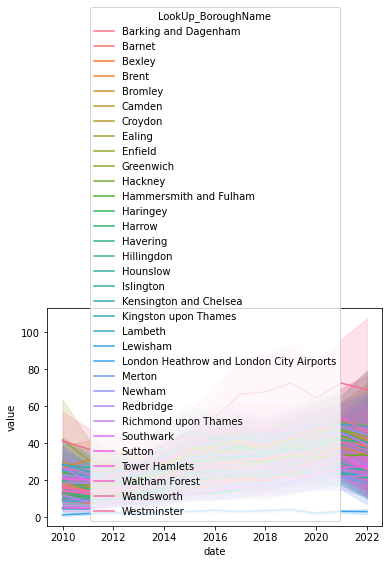

In [56]:
sns.lineplot(data=df[(df.MajorText == 'Public Order Offences')], 
             x='date', y='value', hue='LookUp_BoroughName')

In [49]:
df[(df.MajorText == 'Public Order Offences') & (df.LookUp_BoroughName == 'Westminster')]

,index,MajorText,MinorText,LookUp_BoroughName,yearmonth,value,date
1700,38828,Public Order Offences,"Other Offences Against the State, or Public Order",Westminster,201004,30,2010-01-01
1701,38829,Public Order Offences,Public Fear Alarm or Distress,Westminster,201004,109,2010-01-01
1702,38830,Public Order Offences,Racially or Religiously Aggravated Public Fear...,Westminster,201004,6,2010-01-01
1703,38831,Public Order Offences,Violent Disorder,Westminster,201004,2,2010-01-01
3419,40547,Public Order Offences,"Other Offences Against the State, or Public Order",Westminster,201005,27,2010-01-01
...,...,...,...,...,...,...,...
241845,35565,Public Order Offences,Violent Disorder,Westminster,202202,0,2022-01-01
243389,37109,Public Order Offences,"Other Offences Against the State, or Public Order",Westminster,202203,29,2022-01-01
243390,37110,Public Order Offences,Public Fear Alarm or Distress,Westminster,202203,175,2022-01-01
243391,37111,Public Order Offences,Racially or Religiously Aggravated Public Fear...,Westminster,202203,90,2022-01-01


## Save

In [60]:
df.to_pickle('data/mps.borough.crime.2010-2021.pickle')